In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('magtest_garagefloor2.txt', skiprows=3, parse_dates=[0], header=None)
df.columns = ['LocalTime', 'F', 'X', 'Y', 'Z']
df.head()

,LocalTime,F,X,Y,Z
0,2021-02-03 01:16:04,4597.283546,1686,2082,3736
1,2021-02-03 01:16:14,4579.919104,1683,2073,3721
2,2021-02-03 01:16:24,4598.646105,1679,2096,3733
3,2021-02-03 01:16:34,4602.799691,1686,2087,3740
4,2021-02-03 01:16:44,4580.303702,1686,2075,3719


In [4]:
#Set start / end time
starttime = '2021-02-06 15:30'
endtime = '2021-02-07 09:00'

df1 = df[(df['LocalTime'] > starttime) &(df['LocalTime'] < endtime)]

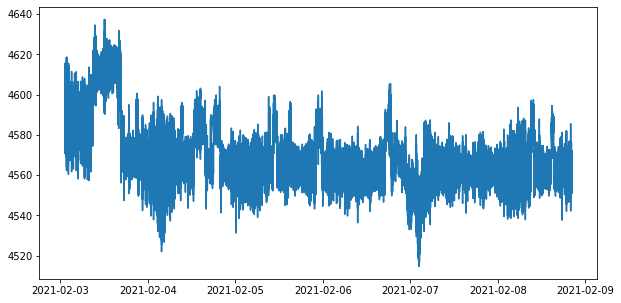

In [7]:
fig, ax = plt.subplots()

ax.plot(df['LocalTime'], df['F'])

plt.rcParams['figure.figsize'] = [10, 5]

In [14]:
df1.loc[:,'F_mean'] = df1['F'].rolling(window=20).mean()   #use .loc to avoid setting with copy warning
df1.head()

,LocalTime,F,X,Y,Z,F_mean
30813,2021-02-06 15:30:09,4571.797130,1808,2271,3532,NaN
30814,2021-02-06 15:30:19,4563.313489,1803,2261,3530,NaN
30815,2021-02-06 15:30:29,4554.867836,1808,2254,3521,NaN
30816,2021-02-06 15:30:39,4558.831978,1808,2262,3521,NaN
30817,2021-02-06 15:30:49,4564.122150,1807,2261,3529,NaN


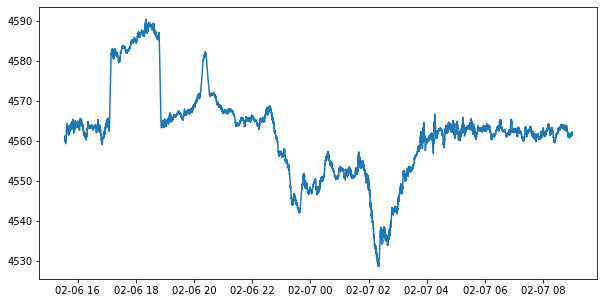

In [16]:
fig, ax = plt.subplots()
ax.plot(df1['LocalTime'], df1['F_mean'])


In [42]:
#The time range I'm looking for
import datetime

print(df1['LocalTime'].min() + datetime.timedelta(hours=9))
print(df1['LocalTime'].max() + datetime.timedelta(hours=9))

2021-02-07 00:30:09
2021-02-07 17:59:58


In [60]:
df_obs = pd.read_csv('https://geomag.usgs.gov/ws/edge/?id=SIT&elements=H,D,Z,F&starttime=2021-02-07T00:30:00&endtime=2021-02-07T17:59:00', 
                     skiprows=21, delim_whitespace=True, parse_dates=[[0,1]], header=None)
df_obs.columns = ['GMTTime', 'DOY', 'SITH', 'SITD', 'SITZ', 'SITF']
df_obs.head()

,GMTTime,DOY,SITH,SITD,SITZ,SITF
0,2021-02-07 00:30:00,38,15759.44,-38.18,52803.02,55192.33
1,2021-02-07 00:31:00,38,15758.89,-37.53,52803.24,55192.33
2,2021-02-07 00:32:00,38,15751.08,-37.15,52801.58,55188.48
3,2021-02-07 00:33:00,38,15749.08,-37.44,52800.92,55187.32
4,2021-02-07 00:34:00,38,15755.26,-37.67,52801.96,55190.11


In [61]:

df_obs['LocalTime'] = df_obs['GMTTime'] - datetime.timedelta(hours=9)
dfresult = pd.merge(df1, df_obs, how='outer', on='LocalTime')

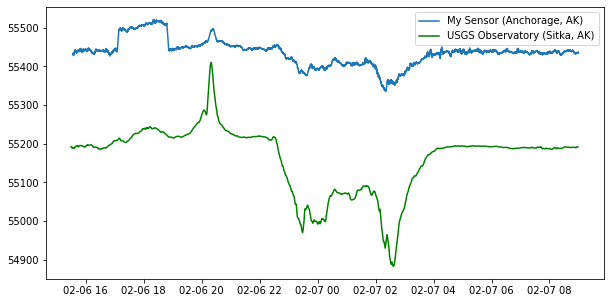

In [75]:
fig, ax = plt.subplots()
ax.plot(dfresult['LocalTime'], dfresult['F_mean']*3+41750, label='My Sensor (Anchorage, AK)')
ax.plot(dfresult['LocalTime'], dfresult['SITF'], label='USGS Observatory (Sitka, AK)', color = 'green')
#ax.set_ylim(56300,56500)
ax.legend(loc='upper right')